# stLearn Analysis approaches
This notebook outlines a pipeline for the loading and analysis of Spatial Resolved Transcriptomics data using in-situ sequencing techniques such as 10xVisium. The data analysed with consist of both 10xVisium for multi-cellular splot resolution data along with Single cell resolution sequencing data from Xenium

## Data Loading and Preparation

In [3]:
#IMPORTS 
import stlearn as st
from pathlib import Path
st.settings.set_figure_params(dpi=180)

In [11]:
WD_PATH = "C:/Users/rdbra/Documents/honours_2024/code_base/ST_honours_2024/basicAnalysis/"
BASE_PATH = Path(WD_PATH+"data/vis_mouse_cor/V1_Adult_Mouse_Brain_")

#Spot tile is the result of image pre-processing
TILE_PATH = Path("/tmp/tiles")
TILE_PATH.mkdir(parents=True, exist_ok=True)

# output path
OUT_PATH = Path(WD_PATH+"sequencedSTanalysis/stLearnPlot/")
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [16]:
data = st.Read10X(BASE_PATH)

c:\Users\rdbra\anaconda3\envs\Honours24\lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\rdbra\anaconda3\envs\Honours24\lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
st.pp.filter_genes(data, min_cells=1)
st.pp.normalize_total(data)
st.pp.log1p(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X


In [19]:
st.pp.tiling(data, TILE_PATH)
st.pp.extract_feature(data)

Tiling image:   0%|           [ time left: ? ]

Tiling image: 100%|██████████ [ time left: 00:00 ]


94765736/94765736 [==============================] - 15s 0us/step


Extract feature: 100%|██████████ [ time left: 00:00 ]  


The morphology feature is added to adata.obsm['X_morphology']!


## Clustering

In [20]:
st.em.run_pca(data, n_comps=50)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


In [26]:
data_SME = data.copy()
st.spatial.SME.SME_normalize(data_SME, use_data="raw")
data_SME.X = data_SME.obsm['raw_SME_normalized']
st.pp.scale(data_SME)
st.em.run_pca(data_SME, n_comps=50)

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by SME is added to adata.obsm['raw_SME_normalized']
Scale step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Applying Kmeans cluster ...


c:\Users\rdbra\anaconda3\envs\Honours24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\rdbra\anaconda3\envs\Honours24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


Kmeans cluster is done! The labels are stored in adata.obs["kmeans"]


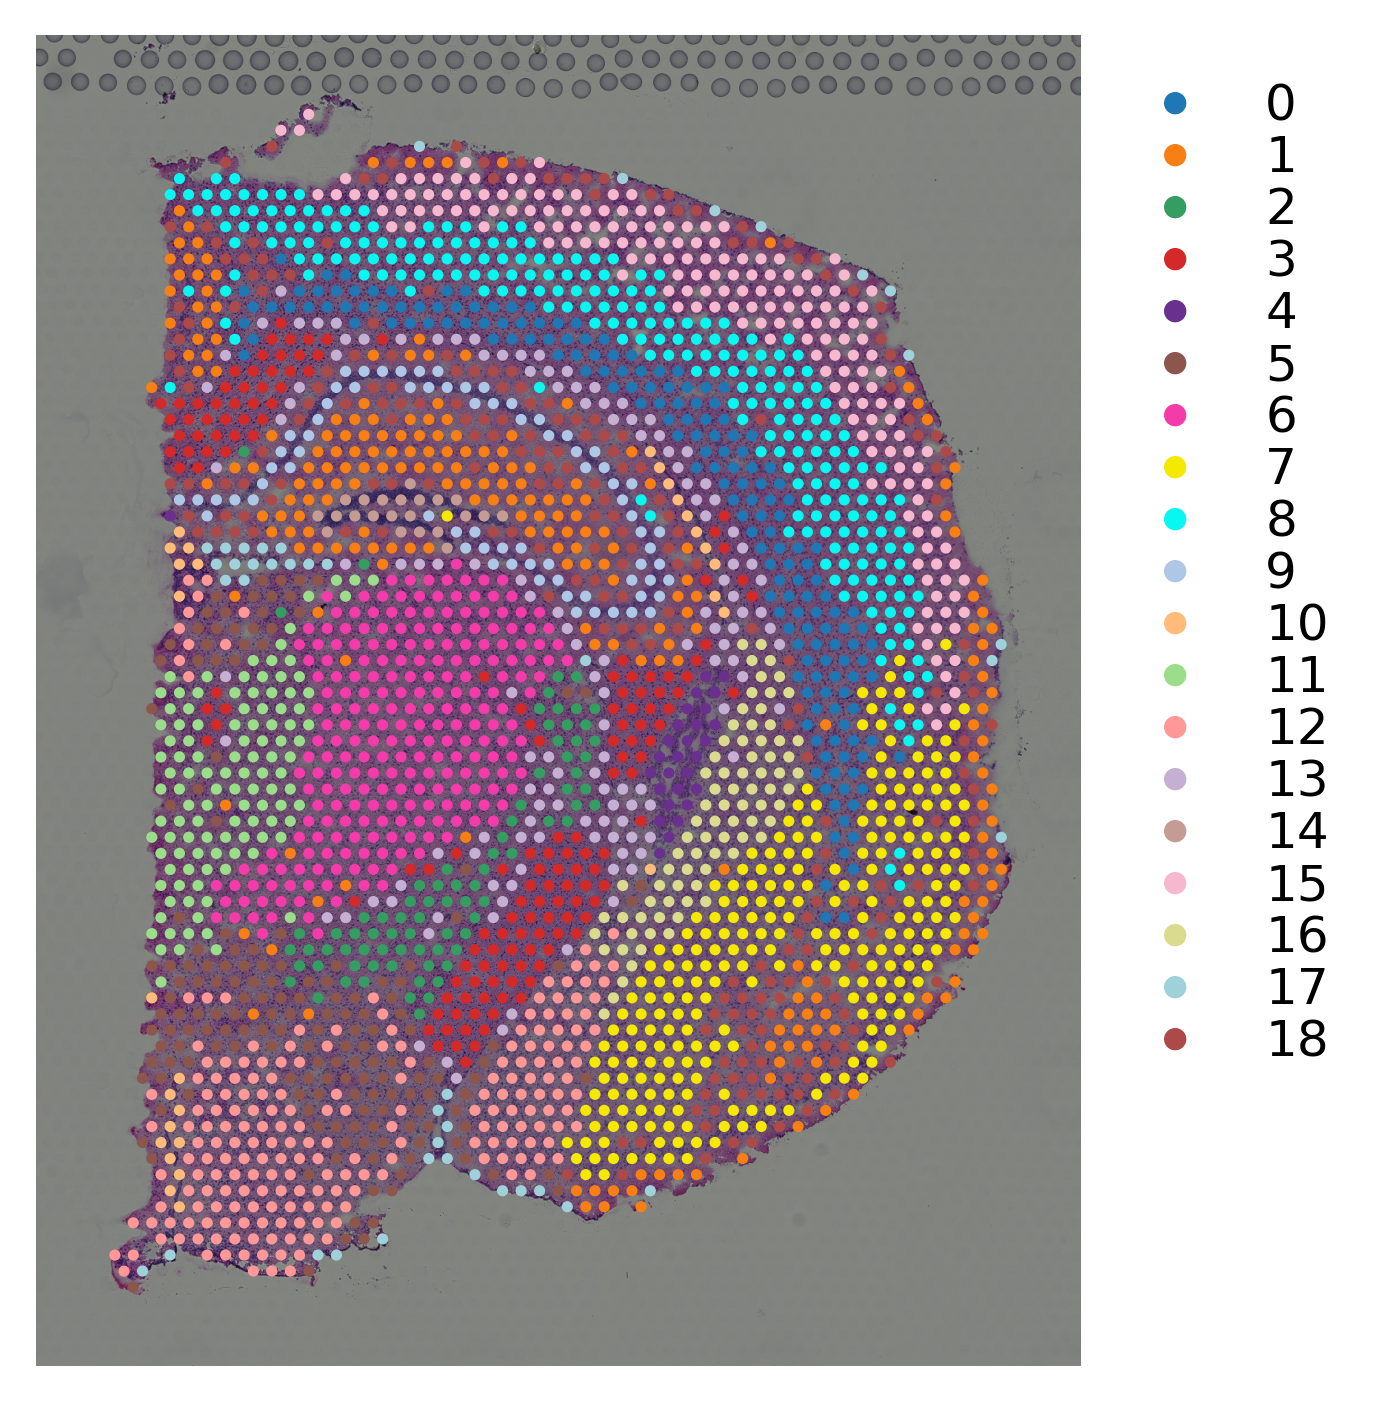

In [28]:
st.tl.clustering.kmeans(data_SME,n_clusters=19, use_data="X_pca", key_added="X_pca_kmeans")
st.pl.cluster_plot(data_SME, use_label="X_pca_kmeans")

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain cluster ...
Louvain cluster is done! The labels are stored in adata.obs['louvain']


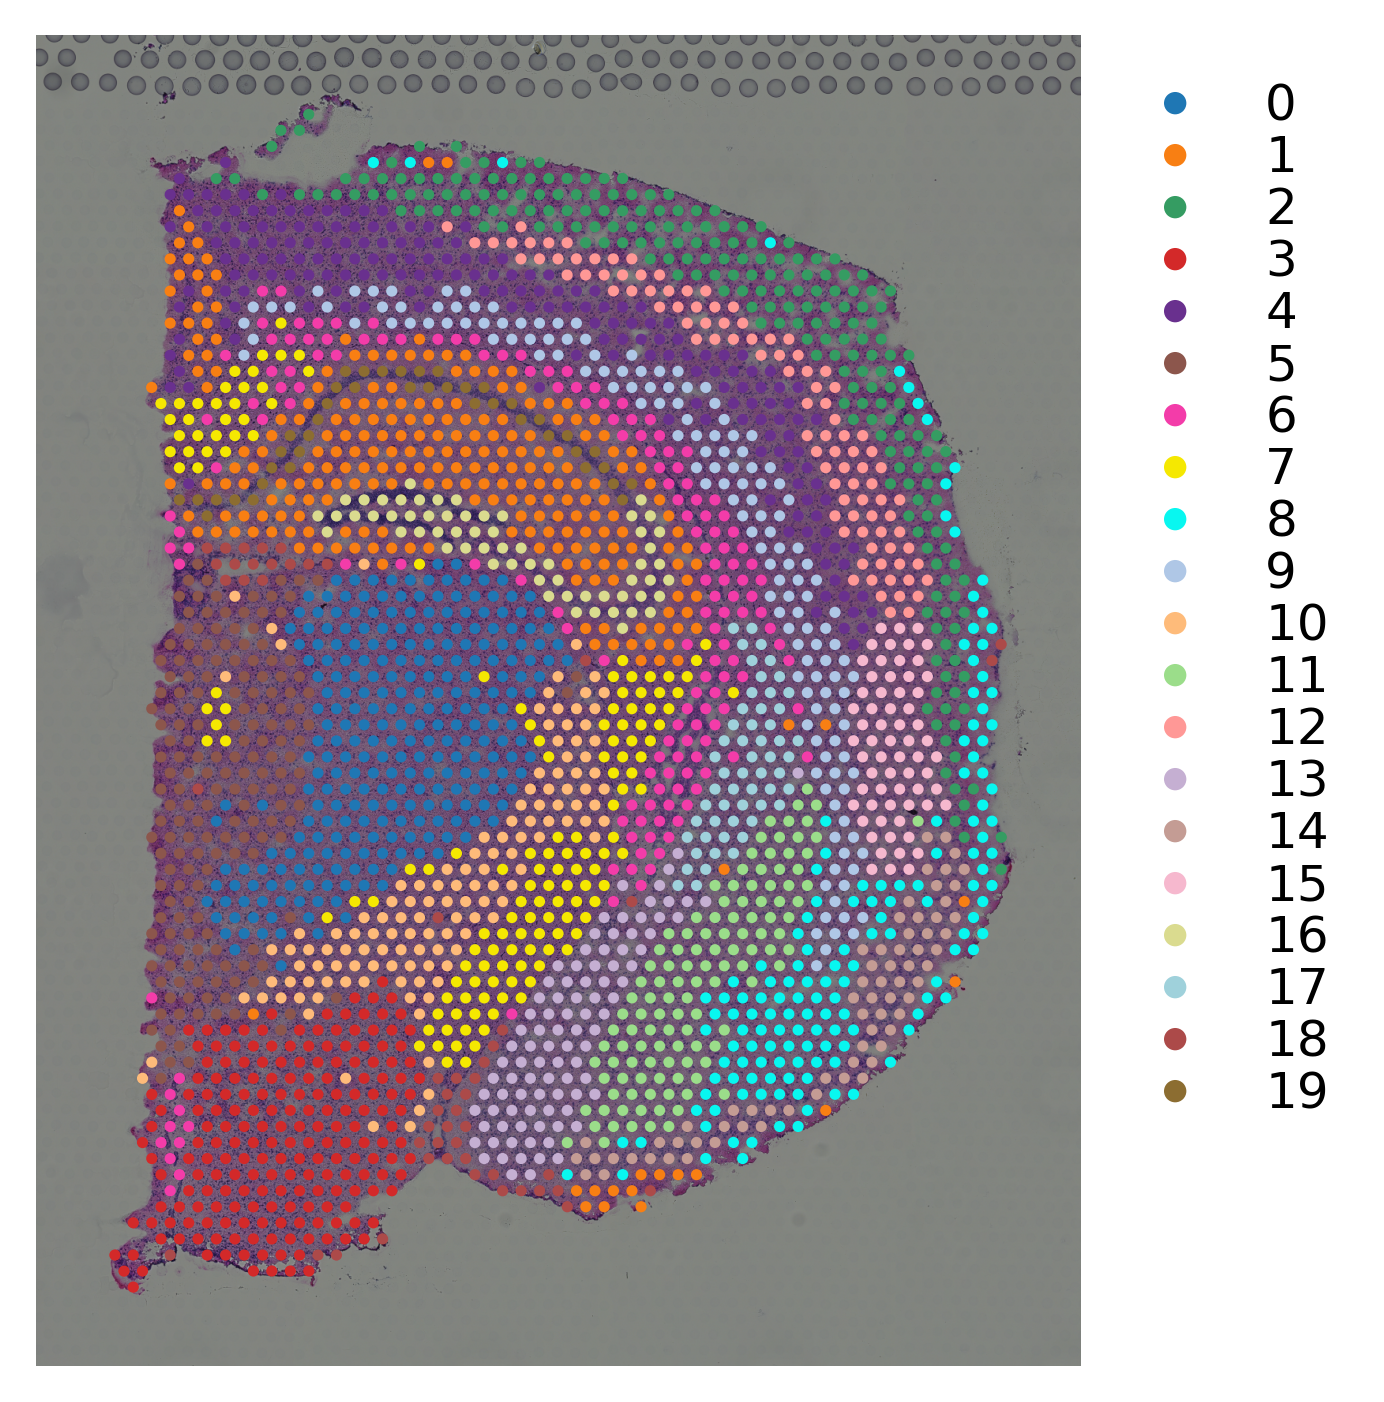

In [30]:
# louvain clustering on stSME normalised data
st.pp.neighbors(data_SME,n_neighbors=17,use_rep='X_pca')
st.tl.clustering.louvain(data_SME, resolution=1.19)
st.pl.cluster_plot(data_SME,use_label="louvain")